### Curate the dataset

In [2]:
def pretty_print_review_and_label(i):
    print(labels[i]+"\t:\t"+reviews[i][:-1]+"...")

#What we know    
g = open("reviews.txt",'r')    
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()
    
#What we want to know
g = open("labels.txt",'r')    
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [3]:
len(reviews)

25000

In [4]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [5]:
print("Label :- \t  : \t Review:-")
pretty_print_review_and_label(0)

Label :- 	  : 	 Review:-
POSITIVE	:	bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t  ...


## Positive And Negative Words List

In [6]:
#import important Library 
from collections import Counter
import numpy as np

In [7]:
positive_count = Counter()
negative_count = Counter()
total_count = Counter()

In [8]:
#iterate through all the reviews and add the positive and negative words and count them
for i in range(len(reviews)):
    if (labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_count[word]+=1
            total_count[word]+=1
    else:
        for word in reviews[i].split(" "):
            negative_count[word]+=1
            total_count[word]+=1                            

In [9]:
positive_count.most_common()

[('', 550468),
 ('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822),
 ('movie', 19074),
 ('his', 17227),
 ('on', 17008),
 ('you', 16681),
 ('he', 16282),
 ('are', 14807),
 ('not', 14272),
 ('t', 13720),
 ('one', 13655),
 ('have', 12587),
 ('be', 12416),
 ('by', 11997),
 ('all', 11942),
 ('who', 11464),
 ('an', 11294),
 ('at', 11234),
 ('from', 10767),
 ('her', 10474),
 ('they', 9895),
 ('has', 9186),
 ('so', 9154),
 ('like', 9038),
 ('about', 8313),
 ('very', 8305),
 ('out', 8134),
 ('there', 8057),
 ('she', 7779),
 ('what', 7737),
 ('or', 7732),
 ('good', 7720),
 ('more', 7521),
 ('when', 7456),
 ('some', 7441),
 ('if', 7285),
 ('just', 7152),
 ('can', 7001),
 ('story', 6780),
 ('time', 6515),
 ('my', 6488),
 ('g

In [10]:
#Calculating the postive and negative ratio to get list of postive and negative 
#and most common word


pos_neg_ratios = Counter()

# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_count.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_count[term] / float(negative_count[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

In [11]:
print("Postive to Negative ration for 'The' :  {} ".format(pos_neg_ratios['the']))

Postive to Negative ration for 'The' :  1.0607993145235326 


In [12]:
"""Here If the word is positive then it has higher value and negative has lower value  """
for word,ratio in pos_neg_ratios.most_common():
    pos_neg_ratios[word] = np.log(ratio)

In [13]:
#print the most common and postive and negative word of the total words
print("Pos - to - neg ration :  {}".format(pos_neg_ratios['the']))
print("Pos - to - neg ration :  {}".format(pos_neg_ratios['amazing']))
print("Pos - to - neg ration :  {}".format(pos_neg_ratios['terrible']))

Pos - to - neg ration :  0.05902269426102881
Pos - to - neg ration :  1.3919815802404802
Pos - to - neg ration :  -1.7291085042663878


In [15]:
##most common word used for postive review
pos_neg_ratios.most_common()

[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796),
 ('refreshing', 1.8551812956655511),
 ('breathtaking', 1.8481124057791867),
 ('bourne', 1.8478489358790986),
 ('lemmon', 1.8458266904983307),
 ('delightful', 1.8002701588959635),
 ('flynn', 1.7996646487351682),
 ('andrews', 1.7764919970972666),
 ('homer', 1.7692866133759964),
 ('beautifully', 1.7626953362841438),
 ('socc

In [16]:
list(reversed(pos_neg_ratios.most_common()))

[('boll', -4.9698132995760007),
 ('uwe', -4.6249728132842707),
 ('seagal', -3.6441435602725449),
 ('unwatchable', -3.2580965380214821),
 ('stinker', -3.2088254890146994),
 ('mst', -2.9502698994772336),
 ('incoherent', -2.9368917735310576),
 ('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('blah', -2.5704288232261625),
 ('horrid', -2.4849066497880004),
 ('pointless', -2.4553061800117097),
 ('atrocious', -2.4259083090260445),
 ('redeeming', -2.3682390632154826),
 ('prom', -2.3608540011180215),
 ('drivel', -2.3470368555648795),
 ('lousy', -2.3075726345050849),
 ('worst', -2.2869878961803778),
 ('laughable', -2.2643638801738479),
 ('awful', -2.2271942470274348),
 ('poorly', -2.2207550747464135),
 ('wasting', -2.2046046846338418),
 ('remotely', -2.1972245773362196),
 ('existent', -2.0794415416798357),
 ('boredom', -1.9951003932460849),
 ('miserably', -1.9924301646902063),
 ('sucks', -1.9870682215488209),
 ('uninspired', -1.9832976811269336),
 ('lame', -1.981767458946166)

# Creating Input and output data

In [17]:
vocab = set(total_count.keys())

In [18]:
vocan_size = len(vocab)
print(vocan_size)

74074


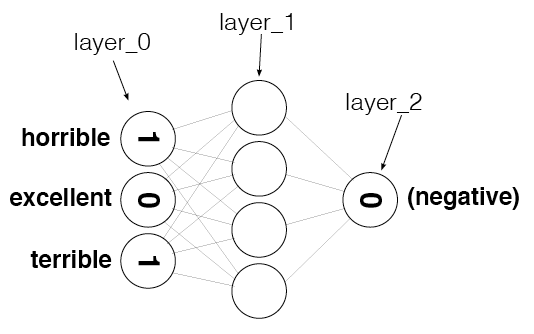

In [19]:
from IPython.display import Image
Image(filename = "sentiment_network_2.png")

In [20]:
#lets first define layer_0 
layer_0 = np.zeros((1,vocan_size))

In [21]:
layer_0.shape

(1, 74074)

In [22]:
#now create a dictionary of words in vocabulary mapped to indexed postion
#for the use in layer_0
wordtoindex = {}
for i,word in enumerate(vocab):
    wordtoindex[word] = i
wordtoindex    

{'': 0,
 'kessler': 1,
 'tutti': 2,
 'blew': 55081,
 'likewarning': 25032,
 'presumptive': 7,
 'especialy': 3,
 'volunteer': 8,
 'bulimia': 9,
 'shittier': 12550,
 'specialist': 37201,
 'hugger': 10,
 'parkes': 11,
 'undecipherable': 12,
 'chakraborty': 52081,
 'sacre': 13,
 'battles': 61738,
 'demagogic': 14,
 'spiderbabe': 15,
 'granzow': 16,
 'whedon': 61737,
 'wwwaaaaayyyyy': 17,
 'sorting': 18,
 'alsobrook': 25043,
 'substitutions': 19,
 'benja': 22,
 'internalised': 23,
 'skeweredness': 24,
 'fungicide': 27,
 'immitative': 26,
 'yipe': 5423,
 'hives': 28,
 'rataud': 29,
 'insists': 30,
 'vicious': 31,
 'suicidees': 32,
 'specialising': 33,
 'baggot': 34,
 'unveils': 40,
 'climby': 38,
 'decalogue': 39,
 'fabrizio': 41,
 'stylisation': 42,
 'conjunctivitis': 43,
 'slopes': 44,
 'appliances': 35552,
 'chamberlain': 45,
 'unamused': 25044,
 'horvarth': 46,
 'updyke': 48,
 'geographically': 49,
 'muddled': 71091,
 'nintendo': 50,
 'passer': 51,
 'aversion': 52,
 'abba': 53,
 'borrada

In [23]:
#Now we have to chnage the input 
def update_input_layer(review):
    """Modify the global layer_0 and represect the review in the vector
    Arguments:-
        review:- the string of review
    review   :-        
        None
    """
    global layer_0
    
    #now clear the layer_0
    layer_0*=0
    for word in review.split(" "):
        layer_0[0][wordtoindex[word]]+=1

In [24]:
update_input_layer(reviews[0])

In [25]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

## Complete the implementation of the return 0 and 1

In [26]:
def get_target_for_label(label):
    """Convert the label to 0 or 1
    Argument:-
    label(string):- Either postive or negative
    return 0 or 1
    """
    if (label == 'POSITIVE'):
        return 1
    else:
        return 0

In [27]:
labels[0]

'POSITIVE'

In [28]:
get_target_for_label(labels[0])

1

In [29]:
get_target_for_label(labels[2])

1

In [30]:
get_target_for_label(labels[3])

0

# Buliding a NeuralNetwork

In [35]:
import time
import sys
import numpy as np

class SentimateNetwork:
    def __init__(self,reviews,labels,hidden_nodes = 10,learning_rate = 0.1):
        """Create the sentimate network for the given settings"""
        """Arguments:-
        reviews:- reviews in the list
        label:- labesl in the list
        hidden_node = Number of nodes to create the hidden Layers
        learning rate :- use while training
        """
        np.random.seed(1)
        
        #pre train the reviews and labels 
        self.pre_process(reviews,labels)
        self.init_network(len(self.reviews_vocab),hidden_nodes, 1, learning_rate)
        
    def pre_process(self,reviews,labels):
        
        #popilate the review_vocab with all the words in the reviews
        reviews_vocab = set()
        for review in reviews:
            for word in review.split(" "):
                reviews_vocab.add(word)
   
        #Convert the vocabulary set to the list where we can use by indices:
        self.reviews_vocab = list(reviews_vocab)
        
        
        #now populate the labels like we did by the labels:
        
        label_vocab = set()
        for label in labels:
            label_vocab.add(label)
        
        #convert the label vocabulary to list 
        self.label_vocab = list(label_vocab)
        
        #store the size of the vocab 
        self.reviews_vocab_size = len(reviews_vocab)
        self.label_vocab_size = len(label_vocab)
        
        #Create the dictionary for words to idex it
        self.word2index = {}
        for i,word in enumerate(self.reviews_vocab):
            self.word2index[word] = i
            
        #create the dictionary for labels and index it
        self.label2index = {}
        for i,label in enumerate(self.label_vocab):
            self.label2index[label] = i
        
    def init_network(self,input_nodes,hidden_nodes,output_nodes,learning_rate):
        #set all the layers
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.hidden_nodes = hidden_nodes
        self.learning_rate = learning_rate
        
        #set the weights of the input and hidden layeers
        self.weights_0_1 = np.zeros((self.input_nodes,self.hidden_nodes))
        
        #weights between hidden and output layer
        self.weights_1_2 = np.random.normal(0.0,self.output_nodes**-0.5,(self.hidden_nodes,self.output_nodes))
        
        #initial input size weights of the input layer
        self.layer_1 = np.zeros((1,hidden_nodes))

    def update_input_layers(self,review):
        #clear the previous state
        self.layer_0 *= 0
        
        for word in review.split(" "):
            if(word in self.word2index.keys()):
                self.layer_0[0][self.word2index[word]]=1
                
    def get_target_for_label(self,label):
        if(label == "POSITIVES"):
            return 1
        else:
            return 0
        
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def sigmoid_output_2_derivativr(self,output):
        return output*(1-output)
    
    def train(self,train_reviews,train_labels):
        #make sure that length of both reviews and label should be same
        assert(len(train_reviews)==len(train_labels))
        
        #keep track of predication
        count_correct = 0
        
        #remenber when we  start the dtatictics of time
        start = time.time()
        #Loop through all the reviews and labels
        for i in range(len(train_reviews)):
            
            review = train_reviews[i]
            label = train_labels[i]
        
            #now performing the forward and backward pass

            #Forward pass

            #input layer
            self.update_input_layers(review)
            
            #hidden layer
            layer_1= self.layer_0.dot(self.weights_0_1)
            
            #output layeer
            layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
            
            #Backward pass
            
            ##Output error
            layer_2_error = layer_2 - self.get_target_for_label(label)
            layer_2_delta = layer_2_error*self.sigmoid_output_2_derivativr(layer_2)
            
            ##Hidden layer error
            layer_1_error = layer_2_delta.dot(self.weights_1_2.T)
            layer_1_delta = layer_1_error
            
            ##update the weights
            self.weights_1_2 -= layer_1.T.dot(layer_2_delta)*self.learning_rate
            self.weights_0_1 -= self.layer_0.T.dot(layer_1_delta)*self.learning_rate
            
            #keep track of correct prediction
            if(layer_2 >= 0.5 and label == "POSITIVE"):
                count_correct+=1
            elif(layer_2 <0.5 and label == "NEGATIVE"):
                count_correct+=1
            
            #for debugging print out the test and time
            elapsed_time = float(time.time()-start)
            reviews_per_second = i / elapsed_time if elapsed_time>0 else 0
            
            sys.stdout.write("\r Progress : -"+str(100*i/float(len(train_reviews)))[:4]\
                            +"%  speed (reviews/sec)"+str(reviews_per_second)[0:5]\
                             +" #correct "+str(count_correct) + " Trained : "+str(i+1)\
                             + " Training Accuracy:" + str(count_correct * 100 / float(i+1))[:4] + "%")
            if (i %2500 == 0):
                print("")
            
        
    def test(self,test_reviews ,test_labels):
        correct = 0
        start = time.time()
        for i in range(len(test_reviews)):
            pred = self.run(test_reviews[i])
            if (pred==test_labels[i]):
                correct +=1
            elapsed_time = float(time.time()-start)
            reviews_per_second = i / elapsed_time if elapsed_time>0 else 0
            
            sys.stdout.write("\rProgress : -"+str(100*i/float(len(test_reviews)))[:4]\
                            +"%speed (reviews/sec)"+str(reviews_per_second)[0:5]\
                             +"#correct "+str(correct) + "Trained : "+str(i+1)\
                             + "Training Accuracy:" + str(correct * 100 / float(i+1))[:4] + "%")
                
    def run(self,review):
        #input layer
        self.update_input_layers(review.lower())
        
        #hidden layer
        layer_1 = self.layer_0.dot(self.weights_0_1)
        
        #output layer
        layer_2 = self.sigmoid(layer_1.dot(self.weights_1_2))
        
        if (layer_2[0]>=0.5):
            return "POSITIVE"
        else:
            return "NEGATIVE"
        

In [36]:
mlp = SentimateNetwork(reviews[:-1000],labels[:-1000],learning_rate=0.1)

In [40]:
mlp.train(reviews[-1000:],labels[-1000:])

 Progress : -0.0%  speed (reviews/sec)0.0 #correct 1 Trained : 1 Training Accuracy:100.%
 Progress : -99.9%  speed (reviews/sec)250.6 #correct 501 Trained : 1000 Training Accuracy:50.1%

In [48]:
mlp = SentimateNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.train(reviews[:-1000],labels[:-1000])

 Progress : -0.0%  speed (reviews/sec)0.0 #correct 1 Trained : 1 Training Accuracy:100.%
 Progress : -10.4%  speed (reviews/sec)240.9 #correct 1251 Trained : 2501 Training Accuracy:50.0%
 Progress : -20.8%  speed (reviews/sec)238.4 #correct 2501 Trained : 5001 Training Accuracy:50.0%
 Progress : -31.2%  speed (reviews/sec)238.7 #correct 3751 Trained : 7501 Training Accuracy:50.0%
 Progress : -41.6%  speed (reviews/sec)240.0 #correct 5001 Trained : 10001 Training Accuracy:50.0%
 Progress : -52.0%  speed (reviews/sec)239.2 #correct 6251 Trained : 12501 Training Accuracy:50.0%
 Progress : -62.5%  speed (reviews/sec)233.6 #correct 7501 Trained : 15001 Training Accuracy:50.0%
 Progress : -72.9%  speed (reviews/sec)232.8 #correct 8751 Trained : 17501 Training Accuracy:50.0%
 Progress : -83.3%  speed (reviews/sec)234.4 #correct 10001 Trained : 20001 Training Accuracy:50.0%
 Progress : -93.7%  speed (reviews/sec)232.2 #correct 11251 Trained : 22501 Training Accuracy:50.0%
 Progress : -99.9%  s

In [39]:
mlp = SentimateNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.001)
mlp.test(reviews[:-1000],labels[:-1000])

Progress : -0.85%speed (reviews/sec)1009.#correct 103Trained : 206Training Accuracy:50.0%

Progress : -1.76%speed (reviews/sec)1048.#correct 213Trained : 425Training Accuracy:50.1%

Progress : -2.60%speed (reviews/sec)1033.#correct 314Trained : 627Training Accuracy:50.0%

Progress : -3.24%speed (reviews/sec)964.0#correct 390Trained : 779Training Accuracy:50.0%

Progress : -4.02%speed (reviews/sec)956.6#correct 483Trained : 966Training Accuracy:50.0%

Progress : -4.79%speed (reviews/sec)950.4#correct 576Trained : 1151Training Accuracy:50.0%

Progress : -5.55%speed (reviews/sec)944.1#correct 667Trained : 1333Training Accuracy:50.0%

Progress : -6.3%speed (reviews/sec)937.6#correct 757Trained : 1513Training Accuracy:50.0%

Progress : -7.05%speed (reviews/sec)932.8#correct 847Trained : 1693Training Accuracy:50.0%

Progress : -7.83%speed (reviews/sec)933.1#correct 941Trained : 1882Training Accuracy:50.0%

Progress : -8.57%speed (reviews/sec)927.3#correct 1029Trained : 2058Training Accuracy:50.0%

Progress : -9.29%speed (reviews/sec)921.4#correct 1116Trained : 2232Training Accuracy:50.0%

Progress : -10.1%speed (reviews/sec)924.7#correct 1213Trained : 2426Training Accuracy:50.0%

Progress : -10.8%speed (reviews/sec)920.2#correct 1300Trained : 2600Training Accuracy:50.0%

Progress : -11.5%speed (reviews/sec)919.3#correct 1392Trained : 2784Training Accuracy:50.0%

Progress : -12.4%speed (reviews/sec)928.4#correct 1499Trained : 2998Training Accuracy:50.0%

Progress : -13.4%speed (reviews/sec)938.3#correct 1610Trained : 3219Training Accuracy:50.0%

Progress : -14.2%speed (reviews/sec)943.6#correct 1715Trained : 3429Training Accuracy:50.0%

Progress : -15.1%speed (reviews/sec)946.6#correct 1817Trained : 3634Training Accuracy:50.0%

Progress : -15.9%speed (reviews/sec)945.5#correct 1910Trained : 3820Training Accuracy:50.0%

Progress : -16.7%speed (reviews/sec)950.5#correct 2016Trained : 4032Training Accuracy:50.0%

Progress : -17.7%speed (reviews/sec)958.5#correct 2130Trained : 4259Training Accuracy:50.0%

Progress : -18.6%speed (reviews/sec)964.8#correct 2241Trained : 4482Training Accuracy:50.0%

Progress : -19.5%speed (reviews/sec)966.0#correct 2341Trained : 4682Training Accuracy:50.0%

Progress : -20.3%speed (reviews/sec)964.9#correct 2437Trained : 4873Training Accuracy:50.0%

Progress : -21.2%speed (reviews/sec)971.0#correct 2550Trained : 5100Training Accuracy:50.0%

Progress : -22.1%speed (reviews/sec)976.7#correct 2664Trained : 5327Training Accuracy:50.0%

Progress : -22.9%speed (reviews/sec)974.1#correct 2755Trained : 5510Training Accuracy:50.0%

Progress : -23.6%speed (reviews/sec)969.3#correct 2840Trained : 5680Training Accuracy:50.0%

Progress : -24.3%speed (reviews/sec)965.4#correct 2927Trained : 5853Training Accuracy:50.0%

Progress : -25.1%speed (reviews/sec)963.2#correct 3017Trained : 6034Training Accuracy:50.0%

Progress : -25.8%speed (reviews/sec)959.3#correct 3103Trained : 6206Training Accuracy:50.0%

Progress : -26.7%speed (reviews/sec)961.1#correct 3206Trained : 6411Training Accuracy:50.0%

Progress : -27.6%speed (reviews/sec)966.2#correct 3320Trained : 6640Training Accuracy:50.0%

Progress : -28.4%speed (reviews/sec)964.3#correct 3411Trained : 6821Training Accuracy:50.0%

Progress : -29.3%speed (reviews/sec)967.7#correct 3520Trained : 7040Training Accuracy:50.0%

Progress : -30.0%speed (reviews/sec)964.4#correct 3606Trained : 7211Training Accuracy:50.0%

Progress : -30.8%speed (reviews/sec)965.6#correct 3708Trained : 7415Training Accuracy:50.0%

Progress : -31.8%speed (reviews/sec)970.6#correct 3825Trained : 7649Training Accuracy:50.0%

Progress : -32.6%speed (reviews/sec)970.9#correct 3924Trained : 7847Training Accuracy:50.0%

Progress : -33.4%speed (reviews/sec)969.2#correct 4014Trained : 8028Training Accuracy:50.0%

Progress : -34.2%speed (reviews/sec)968.6#correct 4110Trained : 8220Training Accuracy:50.0%

Progress : -35.0%speed (reviews/sec)968.5#correct 4207Trained : 8414Training Accuracy:50.0%

Progress : -35.7%speed (reviews/sec)966.6#correct 4296Trained : 8591Training Accuracy:50.0%

Progress : -36.5%speed (reviews/sec)965.3#correct 4388Trained : 8775Training Accuracy:50.0%

Progress : -37.3%speed (reviews/sec)963.7#correct 4478Trained : 8955Training Accuracy:50.0%

Progress : -38.1%speed (reviews/sec)964.1#correct 4577Trained : 9153Training Accuracy:50.0%

Progress : -38.9%speed (reviews/sec)963.0#correct 4669Trained : 9338Training Accuracy:50.0%

Progress : -39.7%speed (reviews/sec)963.7#correct 4770Trained : 9539Training Accuracy:50.0%

Progress : -40.6%speed (reviews/sec)965.3#correct 4875Trained : 9749Training Accuracy:50.0%

Progress : -41.3%speed (reviews/sec)963.8#correct 4964Trained : 9928Training Accuracy:50.0%

Progress : -42.0%speed (reviews/sec)961.1#correct 5049Trained : 10097Training Accuracy:50.0%

Progress : -42.7%speed (reviews/sec)959.1#correct 5135Trained : 10269Training Accuracy:50.0%

Progress : -43.5%speed (reviews/sec)957.6#correct 5223Trained : 10445Training Accuracy:50.0%

Progress : -44.3%speed (reviews/sec)957.7#correct 5319Trained : 10638Training Accuracy:50.0%

Progress : -45.1%speed (reviews/sec)957.2#correct 5415Trained : 10829Training Accuracy:50.0%

Progress : -46.0%speed (reviews/sec)959.7#correct 5525Trained : 11050Training Accuracy:50.0%

Progress : -46.8%speed (reviews/sec)959.4#correct 5620Trained : 11240Training Accuracy:50.0%

Progress : -47.7%speed (reviews/sec)962.0#correct 5732Trained : 11464Training Accuracy:50.0%

Progress : -48.6%speed (reviews/sec)963.9#correct 5841Trained : 11681Training Accuracy:50.0%

Progress : -49.5%speed (reviews/sec)965.0#correct 5945Trained : 11890Training Accuracy:50.0%

Progress : -50.3%speed (reviews/sec)965.0#correct 6042Trained : 12084Training Accuracy:50.0%

Progress : -51.1%speed (reviews/sec)964.4#correct 6135Trained : 12270Training Accuracy:50.0%

Progress : -51.9%speed (reviews/sec)965.5#correct 6240Trained : 12480Training Accuracy:50.0%

Progress : -52.8%speed (reviews/sec)966.5#correct 6344Trained : 12687Training Accuracy:50.0%

Progress : -53.7%speed (reviews/sec)967.4#correct 6447Trained : 12894Training Accuracy:50.0%

Progress : -54.6%speed (reviews/sec)970.3#correct 6564Trained : 13127Training Accuracy:50.0%

Progress : -55.7%speed (reviews/sec)973.7#correct 6685Trained : 13370Training Accuracy:50.0%

Progress : -56.6%speed (reviews/sec)976.3#correct 6801Trained : 13602Training Accuracy:50.0%

Progress : -57.6%speed (reviews/sec)979.0#correct 6918Trained : 13836Training Accuracy:50.0%

Progress : -58.6%speed (reviews/sec)982.1#correct 7039Trained : 14077Training Accuracy:50.0%

Progress : -59.6%speed (reviews/sec)985.4#correct 7162Trained : 14323Training Accuracy:50.0%

Progress : -60.6%speed (reviews/sec)988.6#correct 7284Trained : 14568Training Accuracy:50.0%

Progress : -61.6%speed (reviews/sec)990.8#correct 7400Trained : 14800Training Accuracy:50.0%

Progress : -62.6%speed (reviews/sec)993.2#correct 7518Trained : 15035Training Accuracy:50.0%

Progress : -63.6%speed (reviews/sec)995.1#correct 7633Trained : 15265Training Accuracy:50.0%

Progress : -64.5%speed (reviews/sec)997.5#correct 7752Trained : 15503Training Accuracy:50.0%

Progress : -65.5%speed (reviews/sec)1000.#correct 7872Trained : 15744Training Accuracy:50.0%

Progress : -66.5%speed (reviews/sec)1002.#correct 7992Trained : 15984Training Accuracy:50.0%

Progress : -67.5%speed (reviews/sec)1004.#correct 8110Trained : 16220Training Accuracy:50.0%

Progress : -68.5%speed (reviews/sec)1007.#correct 8232Trained : 16464Training Accuracy:50.0%

Progress : -69.5%speed (reviews/sec)1008.#correct 8347Trained : 16693Training Accuracy:50.0%

Progress : -70.5%speed (reviews/sec)1011.#correct 8471Trained : 16941Training Accuracy:50.0%

Progress : -71.6%speed (reviews/sec)1013.#correct 8594Trained : 17187Training Accuracy:50.0%

Progress : -72.5%speed (reviews/sec)1015.#correct 8712Trained : 17424Training Accuracy:50.0%

Progress : -73.5%speed (reviews/sec)1017.#correct 8830Trained : 17659Training Accuracy:50.0%

Progress : -74.5%speed (reviews/sec)1019.#correct 8948Trained : 17896Training Accuracy:50.0%

Progress : -75.5%speed (reviews/sec)1021.#correct 9067Trained : 18134Training Accuracy:50.0%

Progress : -76.5%speed (reviews/sec)1023.#correct 9186Trained : 18371Training Accuracy:50.0%

Progress : -77.5%speed (reviews/sec)1024.#correct 9303Trained : 18605Training Accuracy:50.0%

Progress : -78.5%speed (reviews/sec)1026.#correct 9425Trained : 18850Training Accuracy:50.0%

Progress : -79.4%speed (reviews/sec)1027.#correct 9537Trained : 19074Training Accuracy:50.0%

Progress : -80.2%speed (reviews/sec)1026.#correct 9631Trained : 19261Training Accuracy:50.0%

Progress : -81.1%speed (reviews/sec)1026.#correct 9734Trained : 19468Training Accuracy:50.0%

Progress : -81.8%speed (reviews/sec)1025.#correct 9827Trained : 19654Training Accuracy:50.0%

Progress : -82.8%speed (reviews/sec)1026.#correct 9941Trained : 19881Training Accuracy:50.0%

Progress : -83.6%speed (reviews/sec)1025.#correct 10040Trained : 20079Training Accuracy:50.0%

Progress : -84.4%speed (reviews/sec)1024.#correct 10131Trained : 20261Training Accuracy:50.0%

Progress : -85.3%speed (reviews/sec)1025.#correct 10245Trained : 20490Training Accuracy:50.0%

Progress : -86.3%speed (reviews/sec)1027.#correct 10363Trained : 20725Training Accuracy:50.0%

Progress : -87.2%speed (reviews/sec)1028.#correct 10476Trained : 20952Training Accuracy:50.0%

Progress : -88.2%speed (reviews/sec)1029.#correct 10593Trained : 21185Training Accuracy:50.0%

Progress : -89.2%speed (reviews/sec)1031.#correct 10715Trained : 21430Training Accuracy:50.0%

Progress : -90.2%speed (reviews/sec)1032.#correct 10831Trained : 21661Training Accuracy:50.0%

Progress : -91.2%speed (reviews/sec)1033.#correct 10952Trained : 21903Training Accuracy:50.0%

Progress : -92.2%speed (reviews/sec)1035.#correct 11071Trained : 22142Training Accuracy:50.0%

Progress : -93.2%speed (reviews/sec)1036.#correct 11190Trained : 22379Training Accuracy:50.0%

Progress : -94.2%speed (reviews/sec)1037.#correct 11307Trained : 22613Training Accuracy:50.0%

Progress : -95.2%speed (reviews/sec)1039.#correct 11427Trained : 22853Training Accuracy:50.0%

Progress : -96.2%speed (reviews/sec)1040.#correct 11548Trained : 23096Training Accuracy:50.0%

Progress : -97.1%speed (reviews/sec)1041.#correct 11663Trained : 23326Training Accuracy:50.0%

Progress : -98.1%speed (reviews/sec)1043.#correct 11783Trained : 23566Training Accuracy:50.0%

Progress : -99.1%speed (reviews/sec)1043.#correct 11898Trained : 23796Training Accuracy:50.0%

Progress : -99.9%speed (reviews/sec)1045.#correct 12000Trained : 24000Training Accuracy:50.0%

In [46]:
mlp = SentimentNetwork(reviews[:-1000],labels[:-1000], learning_rate=0.1)
mlp.train(reviews[:-1000],labels[:-1000])

Progress:0.0% Speed(reviews/sec):0.0 #Correct:1 #Trained:1 Training Accuracy:100.%
Progress:10.4% Speed(reviews/sec):254.8 #Correct:1816 #Trained:2501 Training Accuracy:72.6%
Progress:20.8% Speed(reviews/sec):254.4 #Correct:3791 #Trained:5001 Training Accuracy:75.8%
Progress:31.2% Speed(reviews/sec):254.8 #Correct:5887 #Trained:7501 Training Accuracy:78.4%
Progress:41.6% Speed(reviews/sec):255.2 #Correct:8028 #Trained:10001 Training Accuracy:80.2%
Progress:52.0% Speed(reviews/sec):254.8 #Correct:10160 #Trained:12501 Training Accuracy:81.2%
Progress:62.5% Speed(reviews/sec):254.8 #Correct:12288 #Trained:15001 Training Accuracy:81.9%
Progress:72.9% Speed(reviews/sec):255.0 #Correct:14401 #Trained:17501 Training Accuracy:82.2%
Progress:83.3% Speed(reviews/sec):254.9 #Correct:16574 #Trained:20001 Training Accuracy:82.8%
Progress:93.7% Speed(reviews/sec):254.9 #Correct:18756 #Trained:22501 Training Accuracy:83.3%
Progress:99.9% Speed(reviews/sec):254.9 #Correct:20087 #Trained:24000 Training

In [47]:
mlp.test(reviews[-1000:],labels[-1000:])

Progress:19.7% Speed(reviews/sec):955.8 #Correct:172 #Tested:198 Testing Accuracy:86.8%

Progress:42.4% Speed(reviews/sec):1040. #Correct:372 #Tested:425 Testing Accuracy:87.5%

Progress:65.4% Speed(reviews/sec):1074. #Correct:562 #Tested:655 Testing Accuracy:85.8%

Progress:88.9% Speed(reviews/sec):1097. #Correct:752 #Tested:890 Testing Accuracy:84.4%

Progress:99.9% Speed(reviews/sec):1086. #Correct:846 #Tested:1000 Testing Accuracy:84.6%